In [6]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("Plots")



   Resolving package versions...
   Installed InvertedIndices ──── v1.3.1
   Installed Missings ─────────── v1.2.0
   Installed Crayons ──────────── v4.1.1
   Installed StringManipulation ─ v0.4.1
   Installed DataStructures ───── v0.18.22
   Installed SortingAlgorithms ── v1.2.1
   Installed PrettyTables ─────── v2.4.0
   Installed DataFrames ───────── v1.7.0
    Updating `~/.julia/environments/v1.11/Project.toml`
  [a93c6f00] + DataFrames v1.7.0
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [a8cc5b0e] + Crayons v4.1.1
  [a93c6f00] + DataFrames v1.7.0
  [864edb3b] + DataStructures v0.18.22
  [41ab1584] + InvertedIndices v1.3.1
  [e1d29d7a] + Missings v1.2.0
  [08abe8d2] + PrettyTables v2.4.0
  [a2af1166] + SortingAlgorithms v1.2.1
  [892a3eda] + StringManipulation v0.4.1
Precompiling project...
   1659.3 ms  ✓ InvertedIndices
   1437.3 ms  ✓ Missings
   3838.0 ms  ✓ Crayons
   4272.5 ms  ✓ DataStructures
   4311.5 ms  ✓ StringManipulation
   1037.6 ms  ✓ SortingAlgorithms

In [7]:
#Loading packages
using PlotlyJS, CSV, DataFrames, Plots

In [ ]:
#Setting the working directory
#cd("d:/My Drive/Sciences Po/Spring 2025/Labor Market in Practice/Midterm/Labor-with-Moshe")
cd("/Users/liminglin/我的云端硬盘 (liminglin1998@gmail.com)/Sciences Po/Spring 2025/Labor Market in Practice/Midterm/Labor-with-Moshe")

In [10]:
# Load the overview data (national by year)
df_overview = CSV.read("Data/Annual Data.csv", DataFrame)

Row,Year,Population at Year End,Male Population,Female Population,Urban Population,Rural Population,Labor Force,Employed Persons,Primary Industry,Secondary Industry,Tertiary Industry,Urban Employed Persons,Rural Employed Persons,Number of Employed Persons in Urban Non-private Units,Number of registered unemployed in urban areas,Registered urban unemployment rate (%),Employed by Private Enterprises in Rural Areas,Self-Employed in Rural Areas
,Int64,Int64,Int64,Int64,Int64,Int64,Int64?,Int64,Int64?,Int64?,Int64?,Int64,Int64?,Int64?,Int64?,Float64?,Int64?,Int64?
1,2000,126743,65437,61306,45906,80837,73992,72085,36043,16219,19823,23151,48934,11612,595,3.1,1139,2934
2,2001,127627,65672,61955,48064,79563,73884,72797,36399,16234,20165,24123,48674,11166,681,3.6,1187,2629
3,2002,128453,66115,62338,50212,78241,74492,73280,36640,15682,20958,25159,48121,10985,770,4.0,1411,2474
4,2003,129227,66556,62671,52376,76851,74911,73736,36204,15927,21605,26230,47506,10970,800,4.3,1754,2260
5,2004,129988,66976,63012,54283,75705,75290,74264,34830,16709,22725,27293,46971,11099,827,4.2,2024,2066
6,2005,130756,67375,63381,56212,74544,76120,74647,33442,17766,23439,28389,46258,11404,839,4.2,2366,2123
7,2006,131448,67728,63720,58288,73160,76315,74978,31941,18894,24143,29630,45348,11713,847,4.1,2632,2147
8,2007,132129,68048,64081,60633,71496,76531,75321,30731,20186,24404,30953,44368,12024,830,4.0,2672,2187
9,2008,132802,68357,64445,62403,70399,77046,75564,29923,20553,25087,32103,43461,12193,886,4.2,2780,2167


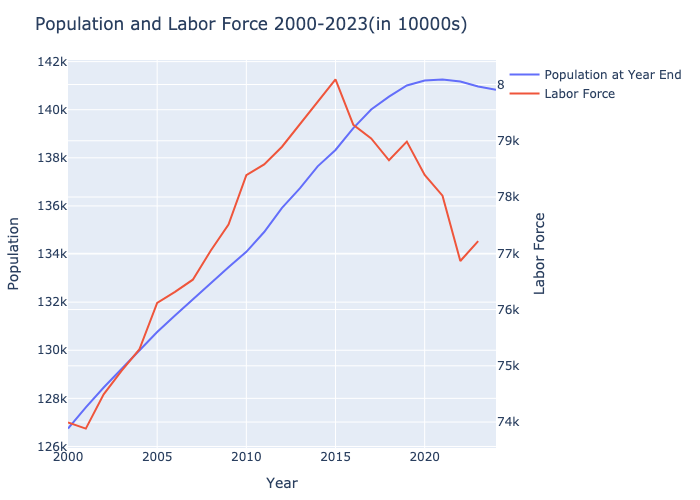

In [11]:
# Population and Labor Force from 2000-2023
#selected_years = 2000:2023
#df_subset_1 = filter(row -> row."Year" in selected_years, df_overview)
pop_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Population at Year End",
    mode = "lines",
    name = "Population at Year End",
    yaxis = "y"   # primary y-axis
)
lf_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Labor Force",
    mode = "lines",
    name = "Labor Force",
    yaxis = "y2"  # secondary y-axis
)
layout1 = PlotlyJS.Layout(
    title = "Population and Labor Force 2000-2023(in 10000s)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Population"),
    yaxis2 = PlotlyJS.attr(
        title = "Labor Force",
        overlaying = "y",  # overlay on the primary y-axis
        side = "right"     # position on the right
    ),
)
pop_labor_graph = PlotlyJS.plot([pop_line, lf_line], layout1)
display(pop_labor_graph)

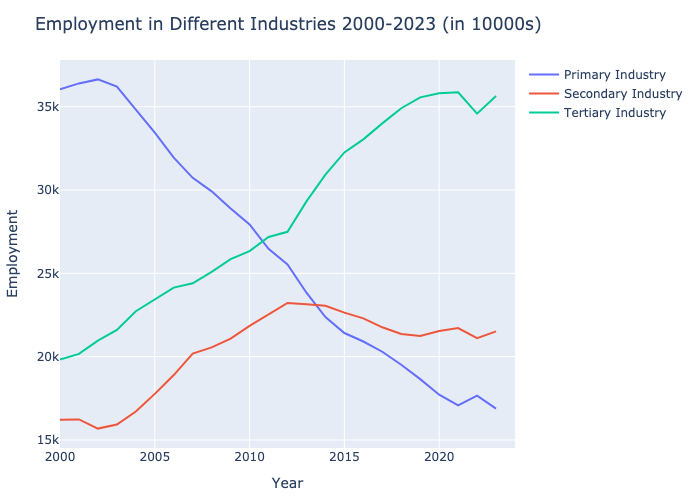

In [12]:
#Evolution of Employment in Different Sectors
pi_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Primary Industry",
    mode = "lines",
    name = "Primary Industry",
    yaxis = "y"   # primary y-axis
)
si_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Secondary Industry",
    mode = "lines",
    name = "Secondary Industry",
    yaxis = "y"   # primary y-axis
)
ti_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Tertiary Industry",
    mode = "lines",
    name = "Tertiary Industry",
    yaxis = "y"   # primary y-axis
)
layout2 = PlotlyJS.Layout(
    title = "Employment in Different Industries 2000-2023 (in 10000s)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([pi_line, si_line, ti_line], layout2))

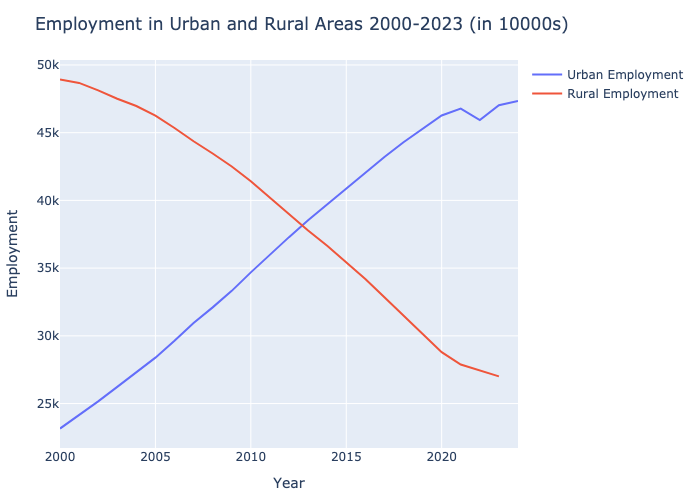

In [13]:
#Evolution of Employment in Urban and Rural Areas
urban_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Urban Employed Persons",
    mode = "lines",
    name = "Urban Employment",
    yaxis = "y"   # primary y-axis
)
rural_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Rural Employed Persons",
    mode = "lines",
    name = "Rural Employment",
    yaxis = "y"   # primary y-axis
)
layout3 = PlotlyJS.Layout(
    title = "Employment in Urban and Rural Areas 2000-2023 (in 10000s)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([urban_line, rural_line], layout3))

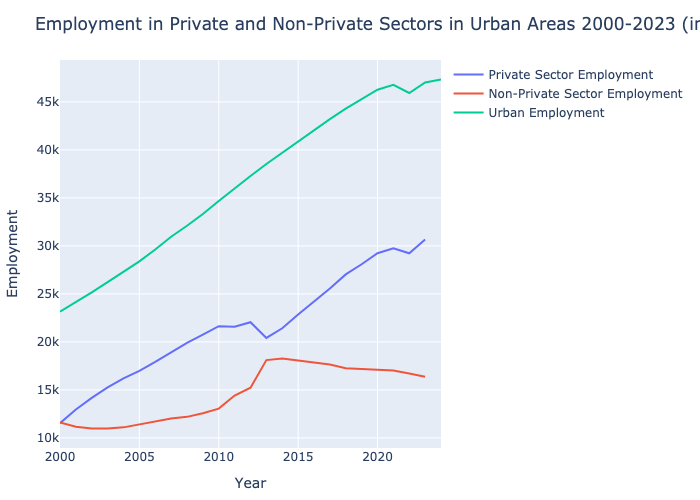

In [20]:
#Comparing Private and Non-Private Sector Employment in Urban Areas
df_overview."Urban Private Sector Employment" = df_overview."Urban Employed Persons" .- df_overview."Number of Employed Persons in Urban Non-private Units"
private_urban_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Urban Private Sector Employment",
    mode = "lines",
    name = "Private Sector Employment",
    yaxis = "y"   # primary y-axis
)
non_private_urban_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Number of Employed Persons in Urban Non-private Units",
    mode = "lines",
    name = "Non-Private Sector Employment",
    yaxis = "y"   # primary y-axis
)
layout4 = PlotlyJS.Layout(
    title = "Employment in Private and Non-Private Sectors in Urban Areas 2000-2023 (in 10000s)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([private_urban_line, non_private_urban_line, urban_line], layout4))

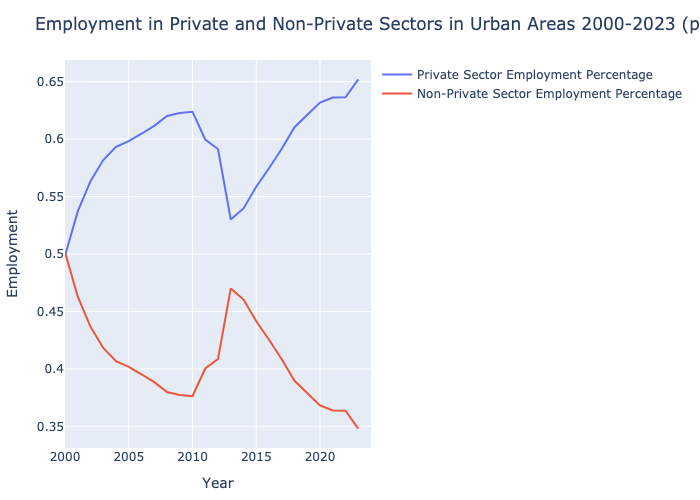

In [16]:
#Comparing Private and Non-Private Sector Employment in Urban Areas (percentage)
df_overview."Urban Private Sector Employment Percentage" = df_overview."Urban Private Sector Employment" ./ df_overview."Urban Employed Persons"
df_overview."Urban Non-Private Sector Employment Percentage" = df_overview."Number of Employed Persons in Urban Non-private Units" ./ df_overview."Urban Employed Persons"
private_urban_line_percentage = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Urban Private Sector Employment Percentage",
    mode = "lines",
    name = "Private Sector Employment Percentage",
    yaxis = "y"   # primary y-axis
)
non_private_urban_line_percentage = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Urban Non-Private Sector Employment Percentage",
    mode = "lines",
    name = "Non-Private Sector Employment Percentage",
    yaxis = "y"   # primary y-axis
)
layout5 = PlotlyJS.Layout(
    title = "Employment in Private and Non-Private Sectors in Urban Areas 2000-2023 (percentage)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([private_urban_line_percentage, non_private_urban_line_percentage], layout5))

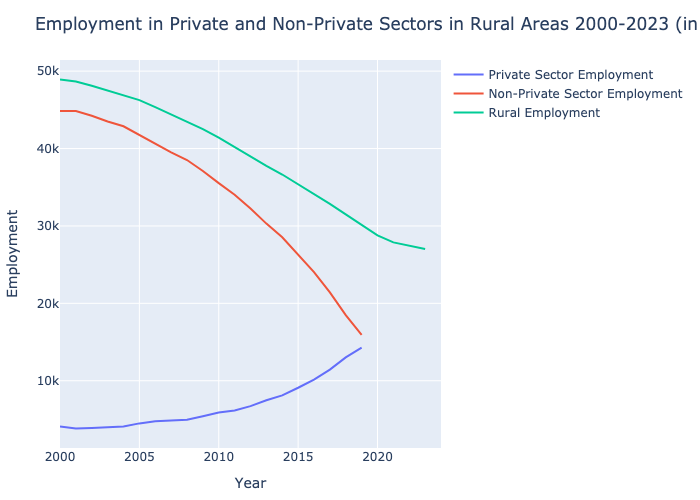

In [19]:
#Comparing Private and Non-Private Sector Employment in Rural Areas
df_overview."Rural Private Sector Employment" = df_overview."Employed by Private Enterprises in Rural Areas" .+ df_overview."Self-Employed in Rural Areas"
df_overview."Rural Non-Private Sector Employment" = df_overview."Rural Employed Persons" .- df_overview."Rural Private Sector Employment"
private_rural_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Rural Private Sector Employment",
    mode = "lines",
    name = "Private Sector Employment",
    yaxis = "y"   # primary y-axis
)
non_private_rural_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Rural Non-Private Sector Employment",
    mode = "lines",
    name = "Non-Private Sector Employment",
    yaxis = "y"   # primary y-axis
)
layout6 = PlotlyJS.Layout(
    title = "Employment in Private and Non-Private Sectors in Rural Areas 2000-2023 (in 10000s)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([private_rural_line, non_private_rural_line, rural_line], layout6))

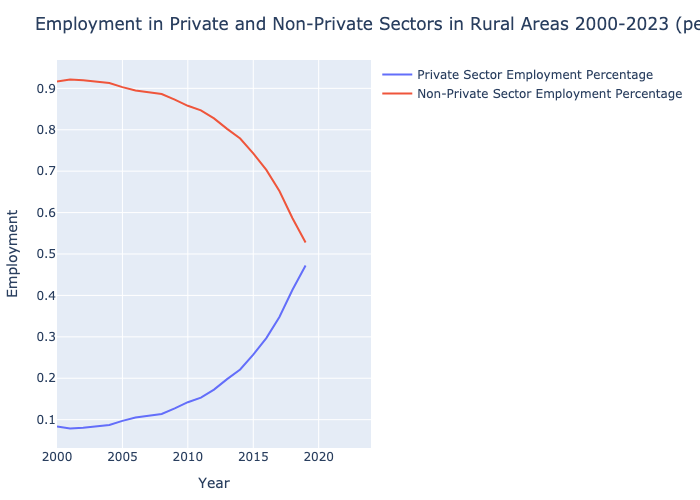

In [18]:
#Comparing Private and Non-Private Sector Employment in Rural Areas (percentage)
#Proabably unnecessary
df_overview."Rural Private Sector Employment Percentage" = df_overview."Rural Private Sector Employment" ./ df_overview."Rural Employed Persons"
df_overview."Rural Non-Private Sector Employment Percentage" = df_overview."Rural Non-Private Sector Employment" ./ df_overview."Rural Employed Persons"
private_rural_line_percentage = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Rural Private Sector Employment Percentage",
    mode = "lines",
    name = "Private Sector Employment Percentage",
    yaxis = "y"   # primary y-axis
)
non_private_rural_line_percentage = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Rural Non-Private Sector Employment Percentage",
    mode = "lines",
    name = "Non-Private Sector Employment Percentage",
    yaxis = "y"   # primary y-axis
)
layout7 = PlotlyJS.Layout(
    title = "Employment in Private and Non-Private Sectors in Rural Areas 2000-2023 (percentage)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([private_rural_line_percentage, non_private_rural_line_percentage], layout7))

In [29]:
df_4_12_year=CSV.read("Data/4-12_AverageWageofEmployedPersonsinUrbanNon-PrivateUnitsbySector by Year.csv", DataFrame)


Row,Year,Average Wage,"Agriculture, Forestry, Animal, Husbandry, and Fishery",Mining,Manufacturing,"Production, and Supply of Electricity, Heat, Gas, and Water",Construction,Wholesale and Retail Trades,"Transport, Storage and Post",Hotels and Catering Services,"Information Transmission, Software and Information Technology",Financial Intermediate,Real Estate,Leasing and Business Services,Scientific Research and Technical Services,"Management of Water Conservancy, Environment and Public Facilities","Services to Households, Repair and other Services",Education,Health and Social Services,"Culture, Sports and Entertainment","Public Management, Social Security and Social Organization"
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2005,18200,8207,20449,15934,24750,14112,15256,20911,13876,38799,29229,20253,21233,27155,14322,15747,18259,20808,22670,20234
2,2010,36539,16717,44196,30916,47309,27529,33635,40466,23382,64436,70146,35870,39566,56376,25544,28206,38968,40232,41428,38242
3,2011,41799,19469,52230,36665,52723,32103,40654,47078,27486,70918,81109,42837,46976,64252,28868,33169,43194,46206,47878,42062
4,2012,46769,22687,56946,41650,58202,36483,46340,53391,31267,80510,89743,46764,53162,69254,32343,35135,47734,52564,53558,46074
5,2013,51483,25820,60138,46431,67085,42072,50308,57993,34044,90915,99653,51048,62538,76602,36123,38429,51950,57979,59336,49259
6,2014,56360,28356,61677,51369,73339,45804,55838,63416,37264,100845,108273,55568,67131,82259,39198,41882,56580,63267,64375,53110
7,2015,62029,31947,59404,55324,78886,48886,60328,68822,40806,112042,114777,60244,72489,89410,43528,44802,66592,71624,72764,62323
8,2016,67569,33612,60544,59470,83863,52082,65061,73650,43382,122478,117418,65497,76782,96638,47750,47577,74498,80026,79875,70959
9,2017,74318,36504,69500,64452,90348,55568,71201,80225,45751,133150,122851,69277,81393,107815,52229,50552,83412,89648,87803,80372


In [ ]:
#Average Wage of Each Industry
df_4_12_year."Primary Industry" = (df_4_12_year."Agriculture, Forestry, Animal, Husbandry, and Fishery" .+ df_4_12_year."Mining" )/2
df_4_12_year."Secondary Industry" = (df_4_12_year."Manufacturing".+df_4_12_year."Production, and Supply of Electricity, Heat, Gas, and Water".+df_4_12_year."Construction")/3
df_4_12_year."Tertiary Industry" = (df_4_12_year."Transport, Storage and Post".+df_4_12_year."Information Transmission, Software and Information Technology".+df_4_12_year."Wholesale and Retail Trades".+df_4_12_year."Hotels and Catering Services".+df_4_12_year."Financial Intermediate".+df_4_12_year."Real Estate".+df_4_12_year."Leasing and Business Services".+df_4_12_year."Scientific Research and Technical Services".+df_4_12_year."Management of Water Conservancy, Environment and Public Facilities".+df_4_12_year."Education".+df_4_12_year."Health and Social Services".+df_4_12_year."Culture, Sports and Entertainment".+df_4_12_year."Public Management, Social Security and Social Organization".+df_4_12_year."Services to Households, Repair and other Services")/14

15-element Vector{Float64}:
  21339.428571428572
  41178.357142857145
  47334.78571428572
  52702.78571428572
  58298.357142857145
  63500.42857142857
  70039.35714285714
  75827.92857142857
  82548.5
  90548.0
  97218.35714285714
 102617.07142857143
 111923.35714285714
 119129.14285714286
 125512.78571428571

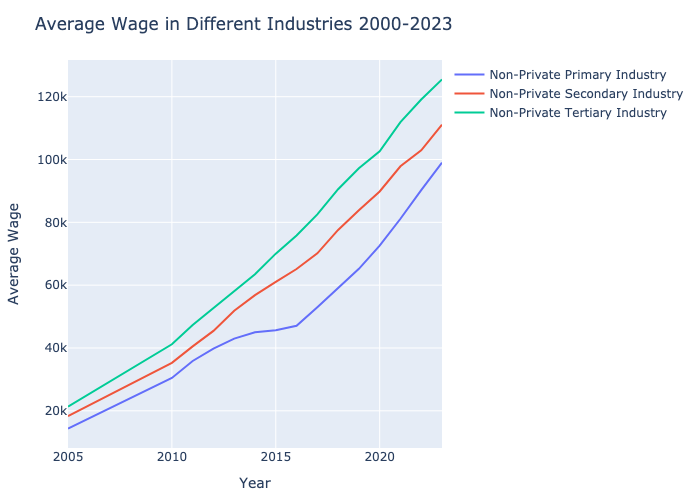

In [45]:
#Evolution of Average Wage in Different Sectors
pi_wage_line = PlotlyJS.scatter(
    x = df_4_12_year."Year",
    y = df_4_12_year."Primary Industry",
    mode = "lines",
    name = "Non-Private Primary Industry",
    yaxis = "y"   # primary y-axis
)
si_wage_line = PlotlyJS.scatter(
    x = df_4_12_year."Year",
    y = df_4_12_year."Secondary Industry",
    mode = "lines",
    name = "Non-Private Secondary Industry",
    yaxis = "y"   # primary y-axis
)
ti_wage_line = PlotlyJS.scatter(
    x = df_4_12_year."Year",
    y = df_4_12_year."Tertiary Industry",
    mode = "lines",
    name = "Non-Private Tertiary Industry",
    yaxis = "y"   # primary y-axis
)
layout8 = PlotlyJS.Layout(
    title = "Average Wage in Different Industries 2000-2023",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Average Wage"),
)
display(PlotlyJS.plot([pi_wage_line, si_wage_line, ti_wage_line], layout8))

In [38]:
#Loading the data for the average wage of employed persons in urban private units by sector
df_4_13_year = CSV.read("Data/4-13_AverageWageofEmployedPersonsinUrbanPrivateUnitsbySector by year.csv", DataFrame)

Row,Year,Average Wage,"Agriculture, Forestry, Animal, Husbandry, and Fishery",Mining,Manufacturing,"Production, and Supply of Electricity,Heat, Gas,and Water",Construction,Wholesale and Retail Trades,"Transport, Storage and Post",Hotels and Catering Services,"Information Transmission, Software and Information Technology",Financial Intermediate,Real Estate,Leasing and Business Services,Scientific Research and Technical Services,"Management of Water Conservancy, Environment and Public Facilities","Services to Households, Repair and other Services",Education,Health and Social Services,"Culture, Sports and Entertainment"
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2010,20759,16370,20981,20090,18834,22228,19928,21989,17531,31226,30513,23228,23879,28886,19607,18350,21862,21571,20012
2,2011,24556,19223,25519,24138,22091,26108,22791,25949,20882,35562,28664,27017,27115,31320,22958,20543,23636,25590,22666
3,2012,28752,21973,29684,28215,25478,30911,27233,28159,23933,39518,32696,30778,31796,36598,26402,24068,26625,29173,26177
4,2013,32706,24645,33081,32035,29597,34882,30604,33141,27352,44060,37253,35038,36243,42854,31241,27483,31521,33862,30402
5,2014,36390,26862,35819,35653,33184,38838,33894,38891,29483,51044,41553,37826,39414,47462,33847,30580,33678,37205,32024
6,2015,39589,28869,38192,38948,34631,41710,36635,40495,31889,57719,44898,41767,43770,50441,37222,33203,37040,40558,34974
7,2016,42833,31301,39600,42115,38605,44803,39589,42705,34712,63578,50366,46063,47836,54764,40099,35824,39508,43993,38228
8,2017,45761,34272,41236,44991,41510,46944,42359,45852,36886,70415,52289,48025,51394,58102,41061,38417,43263,47296,41201
9,2018,49575,36375,44096,49275,44239,50879,45177,50547,39632,76326,62943,51393,53382,61876,42409,41058,46228,52343,44592


In [43]:
#Average Wage of Each Industry
df_4_13_year."Primary Industry" = (df_4_13_year."Agriculture, Forestry, Animal, Husbandry, and Fishery" .+ df_4_13_year."Mining" )/2
df_4_13_year."Secondary Industry" = (df_4_13_year."Manufacturing".+df_4_13_year."Production, and Supply of Electricity,Heat, Gas,and Water".+df_4_13_year."Construction")/3
df_4_13_year."Tertiary Industry" = (df_4_13_year."Transport, Storage and Post".+df_4_13_year."Information Transmission, Software and Information Technology".+df_4_13_year."Wholesale and Retail Trades".+df_4_13_year."Hotels and Catering Services".+df_4_13_year."Financial Intermediate".+df_4_13_year."Real Estate".+df_4_13_year."Leasing and Business Services".+df_4_13_year."Scientific Research and Technical Services".+df_4_13_year."Management of Water Conservancy, Environment and Public Facilities".+df_4_13_year."Education".+df_4_13_year."Health and Social Services".+df_4_13_year."Culture, Sports and Entertainment".+df_4_13_year."Services to Households, Repair and other Services")/13

14-element Vector{Float64}:
 22967.846153846152
 25745.615384615383
 29473.53846153846
 33927.230769230766
 37453.92307692308
 40816.230769230766
 44405.0
 47427.692307692305
 51377.38461538462
 56263.53846153846
 59323.230769230766
 64990.61538461538
 68095.61538461539
 71532.30769230769

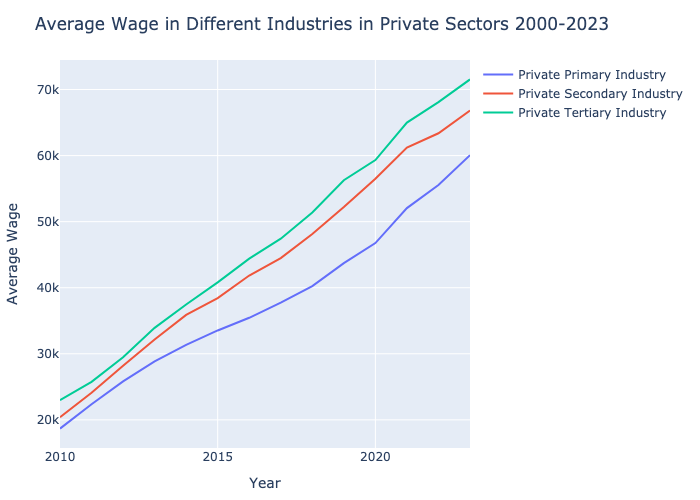

In [46]:
#Evolution of Average Wage in Different Sectors in Private Sectors
pi_wage_line_private = PlotlyJS.scatter(
    x = df_4_13_year."Year",
    y = df_4_13_year."Primary Industry",
    mode = "lines",
    name = "Private Primary Industry",
    yaxis = "y"   # primary y-axis
)
si_wage_line_private = PlotlyJS.scatter(
    x = df_4_13_year."Year",
    y = df_4_13_year."Secondary Industry",
    mode = "lines",
    name = "Private Secondary Industry",
    yaxis = "y"   # primary y-axis
)  
ti_wage_line_private = PlotlyJS.scatter(
    x = df_4_13_year."Year",
    y = df_4_13_year."Tertiary Industry",
    mode = "lines",
    name = "Private Tertiary Industry",
    yaxis = "y"   # primary y-axis
)
layout9 = PlotlyJS.Layout(
    title = "Average Wage in Different Industries in Private Sectors 2000-2023",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Average Wage"),
)
display(PlotlyJS.plot([pi_wage_line_private, si_wage_line_private, ti_wage_line_private], layout9))

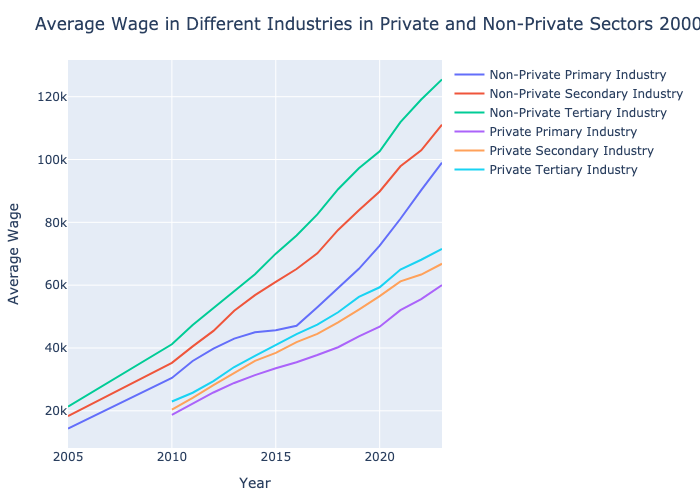

In [47]:
#Comparing Average Wage in Different Sectors in Private and Non-Private Sectors
#trend lines
layout10 = PlotlyJS.Layout(
    title = "Average Wage in Different Industries in Private and Non-Private Sectors 2000-2023",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Average Wage"),
)
display(PlotlyJS.plot([pi_wage_line, si_wage_line, ti_wage_line, pi_wage_line_private, si_wage_line_private, ti_wage_line_private], layout10))